# 2) Titanic Classification: 
Question: How can I create a system to predict if a person will survive the Titanic sinking and 
identify key factors influencing survival like socio-economic status, age, and gender?

In [1]:
#lets load the required packages and libraries for data analysis
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the training and test datasets
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')                                                               
                       

In [3]:
#lets take a look at our training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Now the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# lets see what kind of data we have to work with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Analysis

In [6]:
#printing out a list of all the columns in our training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#printing summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Taking a look at our categorical features we find that:

The passneger column has two sexes with male being the most common.
Cabin feature has many duplicate values.
Embarked has three possible values with most passengers embarking from Southhampton.
Names of all passengers are unique.
Ticket column also has a fair amount of duplicate values.

In [9]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

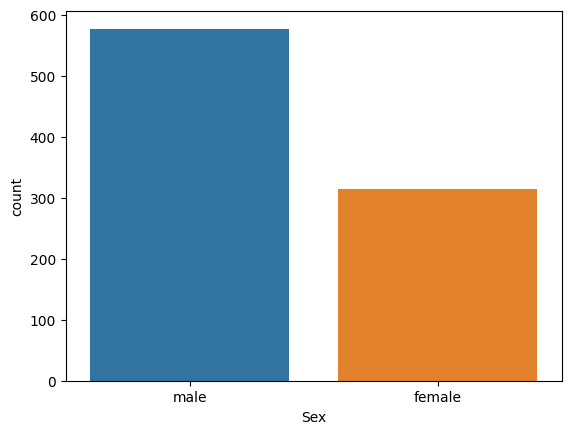

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sex' is a column in the 'train_df' DataFrame
sns.countplot(x='Sex', data=train_df)
plt.show()

,Sex,Survived
0,female,0.742038
1,male,0.188908


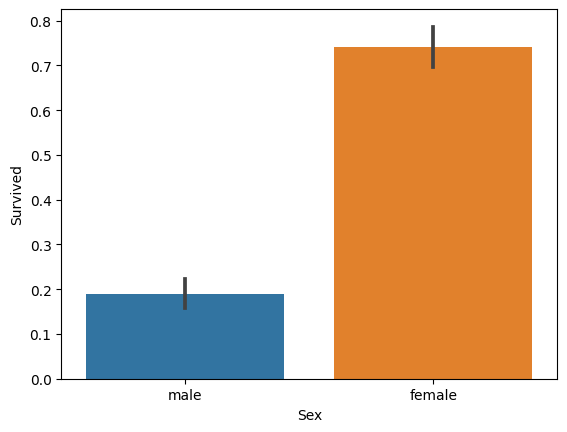

In [14]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


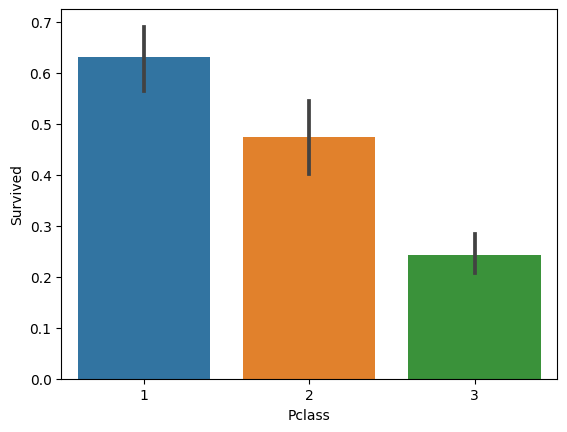

In [15]:
#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


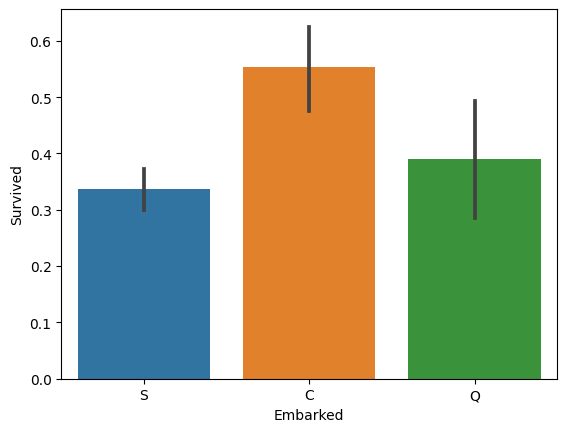

In [16]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


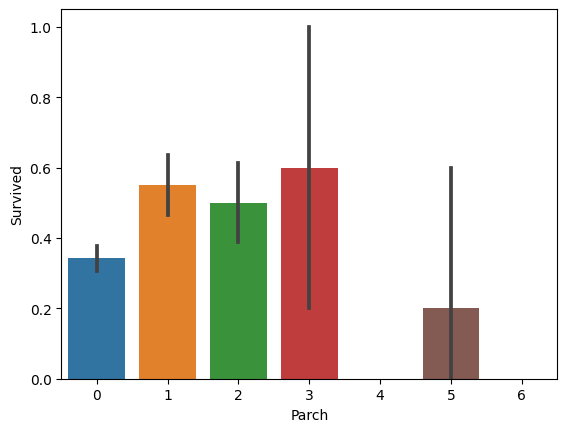

In [17]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


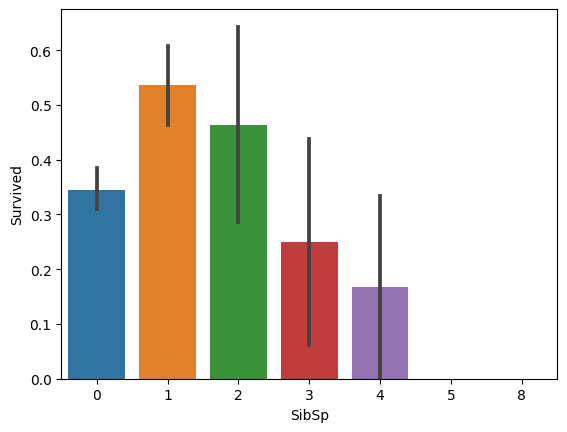

In [18]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

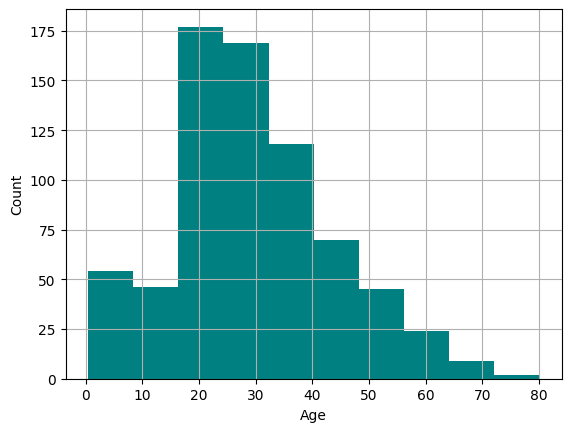

The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [19]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

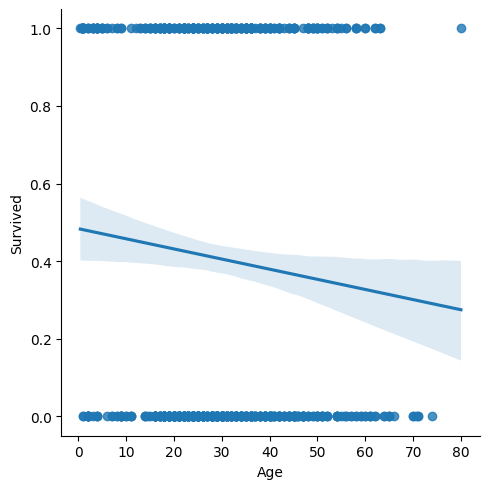

In [20]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

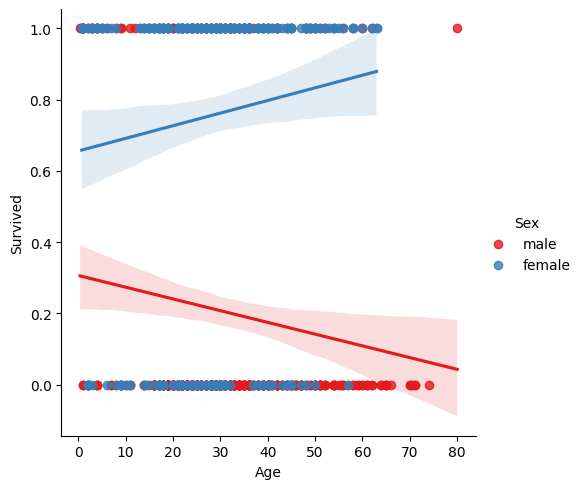

In [21]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

,Sex,Age
0,female,27.0
1,male,29.0


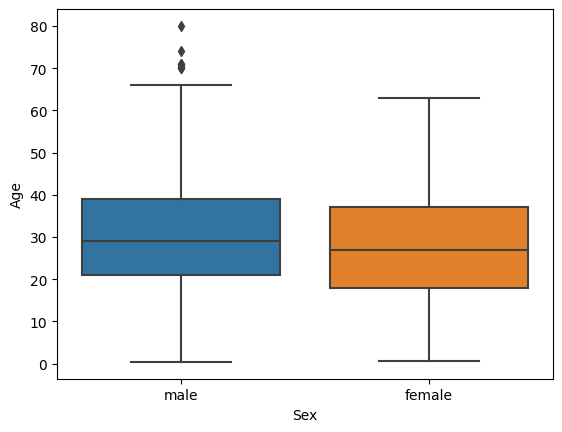

In [22]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is: 32.204207968574636
Median value of Fare is: 14.4542


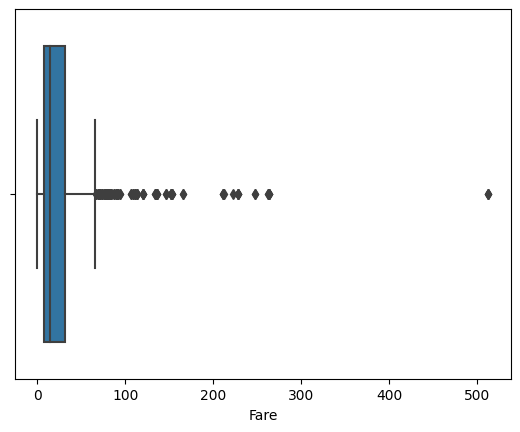

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Fare' is a column in the 'train_df' DataFrame
sns.boxplot(x='Fare', data=train_df)

# Checking the mean and median values
print("Mean value of Fare is:", train_df['Fare'].mean())
print("Median value of Fare is:", train_df['Fare'].median())

# Show the plot
plt.show()


In [25]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [26]:
#filling the missing Embarked values in train and test datasets
train_df.Embarked.fillna('S',inplace=True)

In [27]:
#filling the missing values in the Age column
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)

In [28]:
#Filling the null Fare values in test dataset
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

In [29]:
#combining train and test dataframes to work with them simultaneously
Combined_data = [train_df, test_df]

<AxesSubplot: xlabel='count', ylabel='Title'>

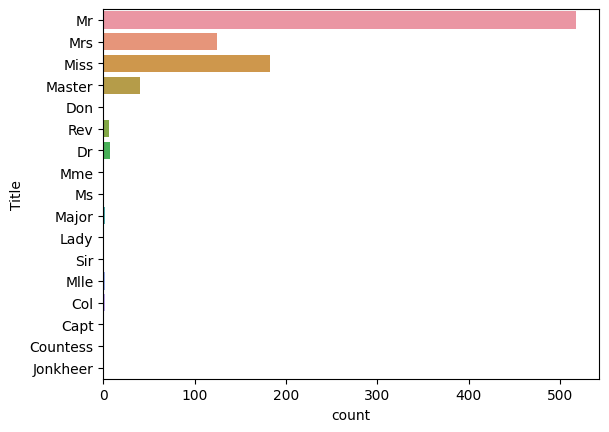

In [30]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=train_df)  

There are some titles that are very rare like Capt and Lady. It would be better to group such titles under one name know as 'rare'. Some titles also seem to be incorrectly spelled. They also need to be rectified.

In [31]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<AxesSubplot: xlabel='count', ylabel='Title'>

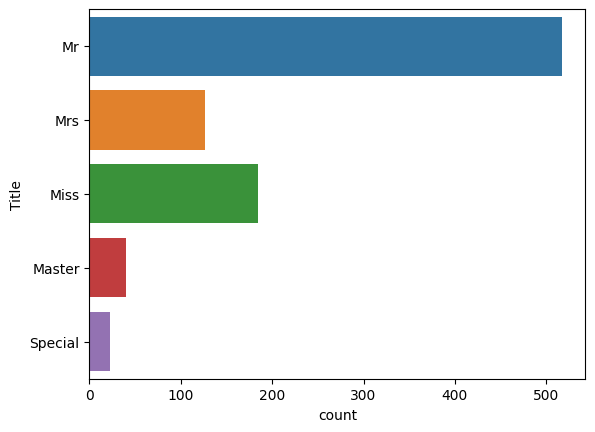

In [32]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_df)

In [33]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [34]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [35]:
#dropping the Name,SibSP and Parch columns
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

In [36]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

In [37]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

In [38]:
#Converting categorical variables into numerical ones
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,False,True,True,False,True
1,1,38.0,71.2833,3,0,0,0,False,False,False,False,False
2,1,26.0,7.9250,2,1,0,0,False,True,False,False,True
3,1,35.0,53.1000,3,0,0,0,False,False,False,False,True
4,0,35.0,8.0500,1,1,0,0,False,True,True,False,True


In [39]:
#creating Age bands
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 

In [40]:
#creating Fare bands
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [41]:
#Dropping the Age and Fare columns
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

In [42]:
train_df2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,False,True,True,False,True,0,0
1,1,3,0,0,0,False,False,False,False,False,3,6
2,1,2,1,0,0,False,True,False,False,True,1,1
3,1,3,0,0,0,False,False,False,False,True,2,5
4,0,1,1,0,0,False,True,True,False,True,2,1


In [43]:
test_df2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,False,True,True,True,False,2,1
1,3,0,0,0,False,True,False,False,True,3,0
2,1,1,0,0,True,False,True,True,False,3,2
3,1,1,0,0,False,True,True,False,True,1,2
4,3,0,0,0,False,True,False,False,True,0,2


In [44]:
#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [45]:
#Splitting out training data into X: features and y: target
X = train_df2.drop("Survived",axis=1) 
y = train_df2["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [46]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

80.6

In [47]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=5)
 
np.mean(cv_scores)*100

80.35904839620865

In [48]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.37838177138912


In [49]:
#Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 8}
Best score: 79.57378695624882


In [50]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)


Best value of parameters: {'max_depth': 3, 'n_estimators': 16}
Best score: 82.26476680685457
